In [110]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn .metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set() 

data = pd.read_csv('./dataset/concatenated.csv')

le = LabelEncoder()

for label in data.columns.values:
    if data[label].dtype == 'object':
        data[label] = le.fit_transform(data[label])
    
     

In [111]:
# RANDOM FOREST model
X = data.drop(['STATUS'], axis=1).drop(['ID'], axis=1)
y = data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler = MinMaxScaler(feature_range=(0, 1))
    # X_train_rescaled = scaler.fit_transform(X_train)
    # X_test_rescaled = scaler.transform(X_test)
RF = RandomForestClassifier()

    # RF.fit(X_train_rescaled, y_train)

    # y_pred = RF.predict(X_test_rescaled)
RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))


Random Forest Classifier
Accuracy: 0.88


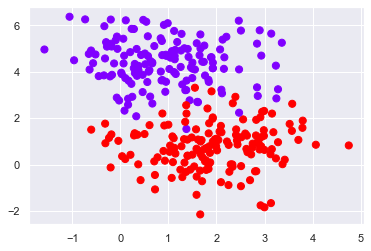

In [112]:
from sklearn.datasets import make_blobs

X_blob, y_blob = make_blobs(n_samples=300, centers=2,
                  random_state=0, cluster_std=1.0)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, s=50, cmap='rainbow');

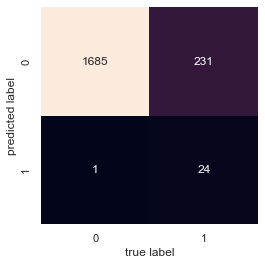

In [113]:
# Confusion matrix
# shows number of values where predicted label and true label match and mismatch (based on test results)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [114]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/var/folders/xc/157m0j111rq00qszkh2xp8540000gn/T/ipykernel_53751/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


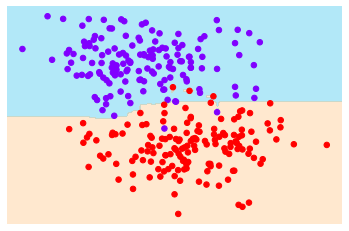

In [115]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X_blob, y_blob);

In [116]:
    # Decision Tree Classifier model
    X = data.drop(['STATUS'], axis=1).drop(['ID'], axis=1)
    y = data['STATUS']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    DT = DecisionTreeClassifier()
    
    DT.fit(X_train, y_train)
    
    y_pred = DT.predict(X_test)

    print("Decision Tree Classifier model")
    print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Classifier model
Accuracy: 0.7789799072642968


/var/folders/xc/157m0j111rq00qszkh2xp8540000gn/T/ipykernel_53751/520376207.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


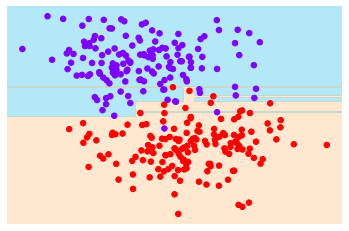

In [117]:
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier().fit(X_train, y_train)
visualize_classifier(DT, X_blob, y_blob);

In [118]:
# LOGISTIC REGRESSION

X = data.drop(['STATUS'], axis=1).drop(['ID'], axis=1)
y = data['STATUS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_rescaled = scaler.fit_transform(X_train)
X_test_rescaled = scaler.transform(X_test)

LogReg = LogisticRegression(max_iter=100)
LogReg.fit(X_train_rescaled, y_train)

print("Logistic Regression model")
print("Accuracy before optimizations:", LogReg.score(X_test_rescaled, y_test))

tolerance = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

params = dict(tol=tolerance, max_iter=max_iter)

model = GridSearchCV(estimator=LogReg, param_grid=params, cv=5)

X_rescaled = scaler.fit_transform(X)
model_result = model.fit(X_rescaled, y)

score, best_params = model_result.best_score_, model_result.best_params_

print("Best params:", best_params, "with accuracy:", score)

LogReg.set_params(**best_params)


Logistic Regression model
Accuracy before optimizations: 0.8686244204018547
Best params: {'max_iter': 100, 'tol': 0.01} with accuracy: 0.8682746166552473


LogisticRegression(tol=0.01)

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='STATUS'>

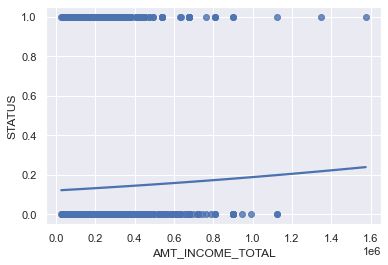

In [119]:
import seaborn as sns

# Positive correlation b/w income and having a late payment 

#define the predictor variable and the response variable
x = data['AMT_INCOME_TOTAL']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='MONTHS_BALANCE', ylabel='STATUS'>

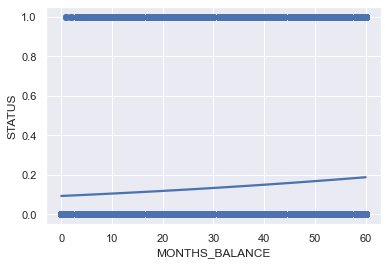

In [120]:
# Positive correlation b/w # of months account is open and having a late payment
#define the predictor variable and the response variable
x = data['MONTHS_BALANCE']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='AGE', ylabel='STATUS'>

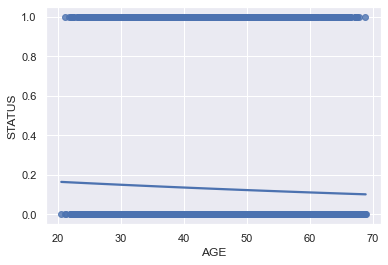

In [121]:
# AGE -> slight negative correlation -> the older you are, the less likely you are to have late payments
#define the predictor variable and the response variable
x = data['AGE']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='STATUS'>

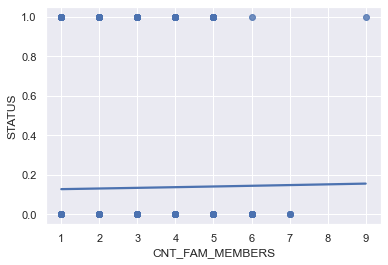

In [122]:
# very slight positive correlation b/w Count of family members and having a late payment
x = data['CNT_FAM_MEMBERS']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='YEARS_EMPLOYED', ylabel='STATUS'>

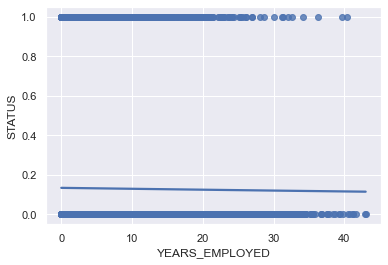

In [123]:
# very slight negative correlation b/w # of years employed and having a late payment
x = data['YEARS_EMPLOYED']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

<AxesSubplot:xlabel='FLAG_OWN_REALTY', ylabel='STATUS'>

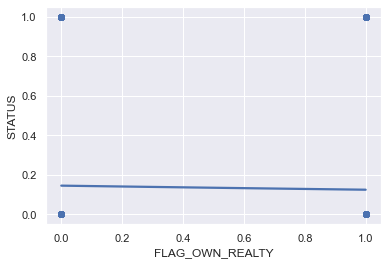

In [124]:
# very slight negative correlation b/w owning realty and having a late payment
x = data['FLAG_OWN_REALTY']
y = data['STATUS']

sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)